In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000750556"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000750556
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,SUNTRUST BANKS INC
Ticker,STI


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,45.0,4.287756e+01,5.822523e+00,3.529000e+01,3.729000e+01,4.497000e+01,4.842000e+01,5.126000e+01
interest income,74.0,1.682886e+09,4.021422e+08,1.173864e+09,1.360000e+09,1.572040e+09,1.834000e+09,2.564731e+09
net income,74.0,3.845369e+08,2.904076e+08,-8.151670e+08,2.960272e+08,4.380000e+08,5.355880e+08,1.077000e+09
net interest income,74.0,1.223553e+09,1.675768e+08,7.995130e+08,1.165169e+09,1.211000e+09,1.304500e+09,1.547000e+09
provision for loan losses,74.0,2.294196e+08,2.748431e+08,1.055600e+07,6.114200e+07,9.900000e+07,3.277500e+08,1.133929e+09
total revenue,66.0,2.178147e+09,2.537128e+08,1.770800e+09,2.043750e+09,2.173000e+09,2.244375e+09,3.843000e+09


# Plots

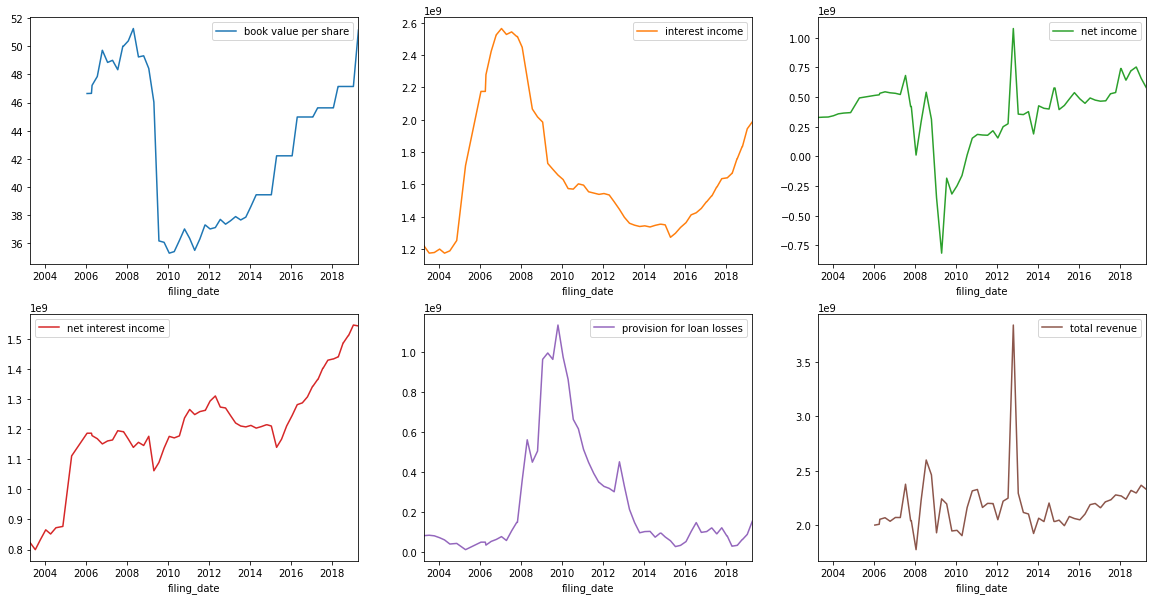

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000750556 book value per share       2003Q1 to 2005Q3: 11 periods  missing   
           book value per share        2014Q2 to 2014Q4: 3 periods  missing   
           book value per share        2015Q2 to 2015Q4: 3 periods  missing   
           book value per share        2016Q2 to 2016Q4: 3 periods  missing   
           book value per share        2017Q2 to 2017Q4: 3 periods  missing   
           book value per share        2018Q2 to 2018Q4: 3 periods  missing   
           interest income                                  2004Q4  missing   
           interest income             2005Q2 to 2005Q3: 2 periods  missing   
           net income                                       2004Q4  missing   
           net income                  2005Q2 to 2005Q3: 2 periods  missing   
           net interest income                              2004Q4  missing   
           net interest income         2005Q2 to 2005Q3: 2 periods  missing   
           provision for loan losses                        2004Q4  missing   
           provision for loan losses   2005Q2 to 2005Q3: 2 periods  missing   
           total revenue              2003Q1 to 2005Q3: 11 periods  missing   

                                             message  
cik        item                                       
0000750556 book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()